In [1]:
import stochpy
smod = stochpy.SSA(IsQuiet=True)
# required for iPython Notebook inline plotting
%matplotlib inline


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

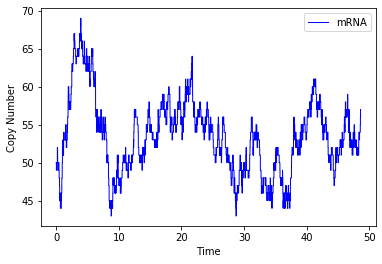

In [2]:
smod.DoStochSim(IsTrackPropensities=True)
smod.PlotSpeciesTimeSeries()
smod.PlotPropensitiesTimeSeries()

In [ ]:
# Show the means from the data of last generated trajectory
smod.Model('ImmigrationDeath.psc')
smod.DoStochSim(trajectories=3,end=10**3) # multiple trajectories
print(smod.data_stochsim.simulation_trajectory)
smod.PrintSpeciesMeans()
smod.PrintSpeciesStandardDeviations()

In [5]:
# Switch to data from trajectory 1 and show the means of each species
smod.GetTrajectoryData(1)
smod.PrintSpeciesMeans()
smod.PrintSpeciesStandardDeviations()

Species	Mean
mRNA	50.057
Species	Standard Deviation
mRNA	4.438


In [3]:
# Do one long simulation
smod.DoStochSim(trajectories=1,end=10**6,mode='steps')
smod.PrintSpeciesMeans()
smod.PrintSpeciesStandardDeviations()

Species	Mean.....    
mRNA	49.910
Species	Standard Deviation
mRNA	7.103


/Users/sariaazam/opt/anaconda3/lib/python3.7/site-packages/stochpy/modules/Analysis.py:590: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  output = plt.hist(distributions[i][0],L_bin_edges,weights = distributions[i][1],ls = linestyle,lw = linewidth,color = self.colors[j],histtype = histtype,orientation=orientation,normed=False)


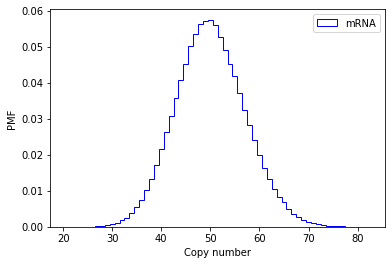

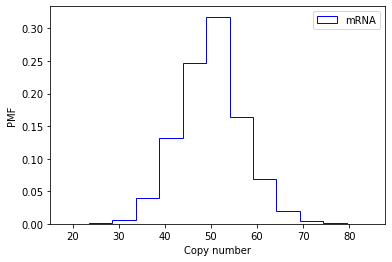

In [7]:
# Plot the PDF for different bin sizes
smod.PlotSpeciesDistributions()
smod.PlotSpeciesDistributions(bin_size=5)  # larger bin size
smod.Export2File(analysis='distribution',datatype='species')

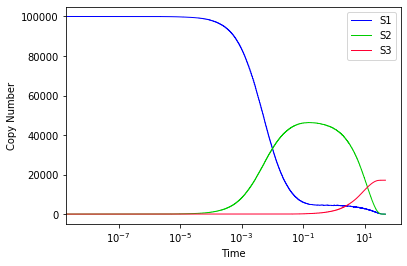

In [5]:
smod.Model('DecayingDimerizing.psc')
smod.DoStochSim(method='tauleaping',end=50,mode='time')
smod.PlotSpeciesTimeSeries()
stochpy.plt.xscale('log')

In [6]:
# Model modification
smod = stochpy.SSA() # loads the default immigration-death model
smod.ChangeParameter('Ksyn',20.0)
smod.ChangeParameter('Kdeg',0.2)
smod.ChangeInitialSpeciesCopyNumber('mRNA',100)
smod.DoStochSim(end=10**5)
smod.PrintSpeciesMeans()   # should be ~Ksyn/Kdeg

Species	Mean..
mRNA	99.717


In [10]:
# Import a model written in SBML and generate a regular grid to compare different trajectories
smod.Model('dsmts-001-01.xml')
smod.DoStochSim(trajectories=100,end=50,mode='time') 
smod.GetRegularGrid()
smod.PlotAverageSpeciesTimeSeries()
smod.Export2File(datatype='species',analysis='timeseries',IsAverage=True)

No module named 'libsbml'
SBML load error

No SBML library available


SystemExit: 

/Users/sariaazam/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


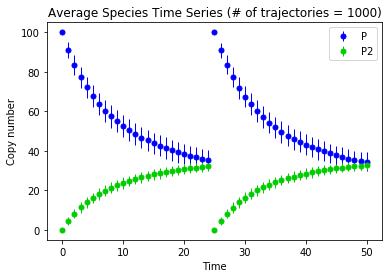

In [7]:
# Test a model with a time event
smod.Model('dsmts-003-03.xml.psc') 
smod.DoStochSim(trajectories=1000,end=50,mode='time')
smod.GetRegularGrid()
smod.PlotAverageSpeciesTimeSeries()

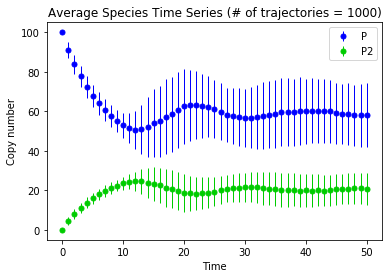

In [8]:
# Use the First Reaction method to test a model with a species amount event 
smod.Model('dsmts-003-04.xml.psc') 
smod.DoStochSim(method = 'FirstReactionMethod',trajectories=1000,end=50,mode='time')
smod.GetRegularGrid()
smod.PlotAverageSpeciesTimeSeries()

*** WARNING ***: Species are given in concentrations and the compartment volume is unequal to one.
The species concentrations are multiplied by the compartment volume.
*** WARNING ***: Species are given in concentrations and the compartment volume is unequal to one.
The species concentrations are multiplied by the compartment volume.


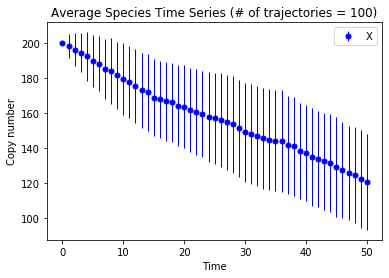

In [9]:
# Volume Models
smod.Model('dsmts-001-11.xml.psc') 
smod.DoStochSim(method = 'Direct',trajectories=100,end=50,mode ='time')
smod.GetRegularGrid()
smod.PlotAverageSpeciesTimeSeries()

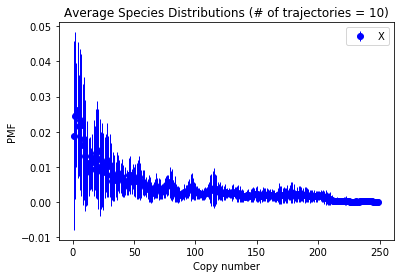

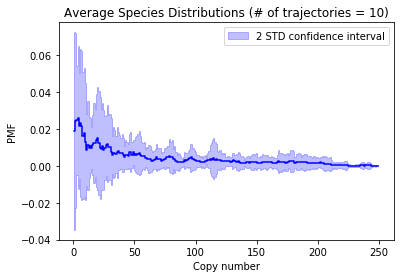

In [10]:
smod.DoStochSim(trajectories=10,end=10**5)
smod.GetRegularGrid(n_samples=51)
smod.PlotAverageSpeciesDistributions()
smod.PlotAverageSpeciesDistributionsConfidenceIntervals(nstd=2)